# Python Machine Learning for Biology
# Clustering

## K-means Clustering

In [4]:
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#### Make some blob data!

In [5]:
X, y = make_blobs(
    n_samples    =  200, 
    centers      =  3, 
    n_features   =  2,
    random_state =  0
)

In [6]:
blobs = pd.DataFrame(X, columns=['X', 'y'])
blobs.head()

,X,y
0,-1.733808,3.798061
1,0.628358,4.460136
2,1.131218,4.681950
3,-1.429179,3.500836
4,1.274508,5.630173


#### Make a scatterplot of your blob data 

#### Fit a K-means model with 3 clusters

#### Get the predicted labels and centroids

#### Make a new column in the blobs dataframe for the predicted labels

#### Visually verify cluster labels

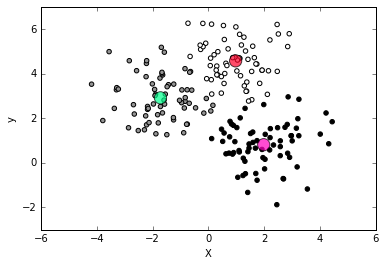

In [12]:
plt.figure(figsize=(7,7))
blobs.plot(x="X", y="y", kind="scatter", color=blobs['predicted'], )
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, c=range(0,3), cmap='gist_rainbow')

#### Calculate the silhouette coefficience

# Independent Work

Use the "pluton.csv" dataset, fit a k-means clustering model. Use Pu239 and Pu240 as the features.

# Hierarchical Clustering

We will perform hierarchical clustering analysis on a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.

#### Read in the libraries

In [28]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
%matplotlib inline

#### Read in file

#### Create a scatterplot to see if we can find clusters

#### Convert our data to a matrix to pass to the clustering algorithm 
The matrix makes it easier for our algorithm to compute distance.

In [31]:
X = lang.as_matrix(columns=None)

#### Implement the clustering algorithm.

#### Calculate the cophenetic correlation coefficient
See how well our algorithm has measured the distances between the points.

### Make a dendrogram

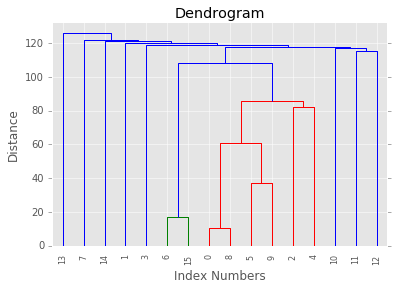

In [35]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

In [40]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
    ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1))

A Jupyter Widget

<function __main__.plot_wrapper>

Clusters represented at distance:  {1}
Clusters represented at distance:  {1}
Clusters represented at distance:  {1}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
Clusters represented at distance:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


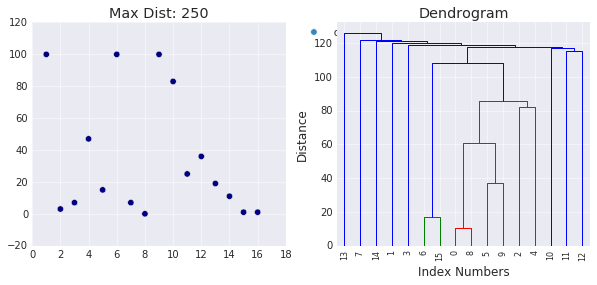

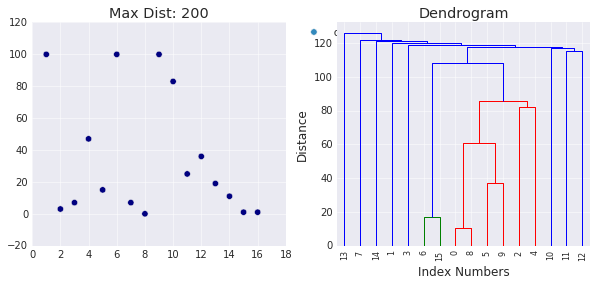

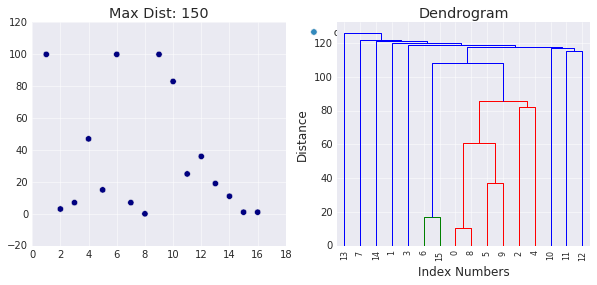

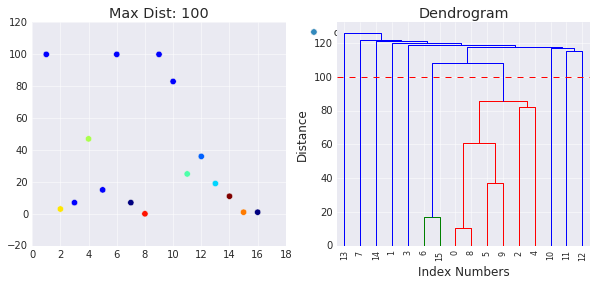

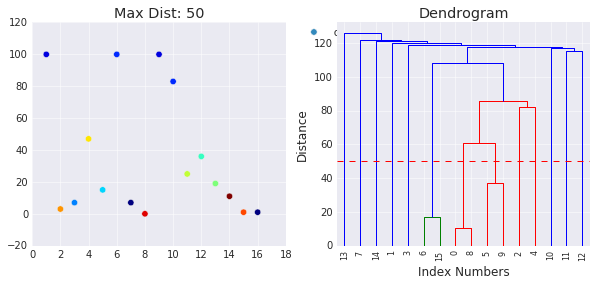

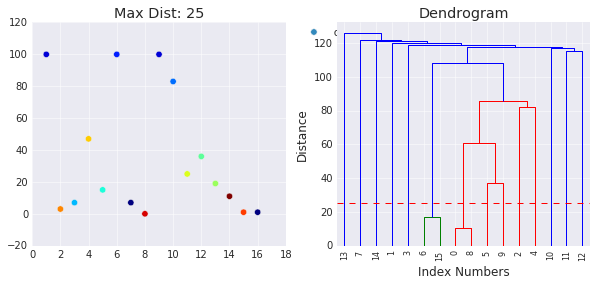

In [42]:
plot_dist_thresh(250)
plot_dist_thresh(200)
plot_dist_thresh(150)
plot_dist_thresh(100)
plot_dist_thresh(50)
plot_dist_thresh(25)

### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

#### Generate sample data

In [24]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [25]:
X = StandardScaler().fit_transform(X)

### Compute DBSCAN

In [26]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

### Number of clusters in labels, ignoring noise if present.

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [28]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


#### Plot result

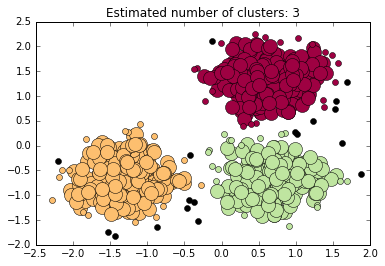

In [29]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Independent Work
Fit a DBSCAN to the iris dataset (or another dataset of your choice)

## Clustering Metrics

#### Load in the chemical data and make a scatterplot

In [16]:
chem = pd.read_csv('data/chem.csv').iloc[:, 1:]

In [17]:
chem.head()

,Al,Ca,Fe,K,Mg,Mn,Na,P,Si,Ti
0,101,11,-22,-17,-34,-41,27,-36,-58,-28
1,50,129,23,-82,47,33,61,90,-24,9
2,5,65,-22,-96,-33,7,47,49,30,-39
3,-40,-16,-158,-70,-104,-114,53,-61,103,-160
4,-13,30,-82,-113,26,-41,65,-90,43,-130


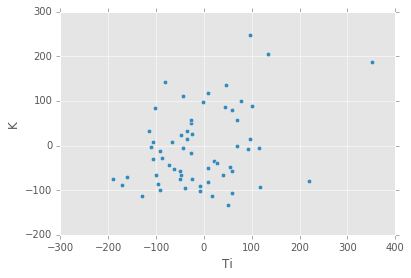

In [18]:
chem.plot(kind="scatter", x="Ti", y="K")

#### Silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.41813365052


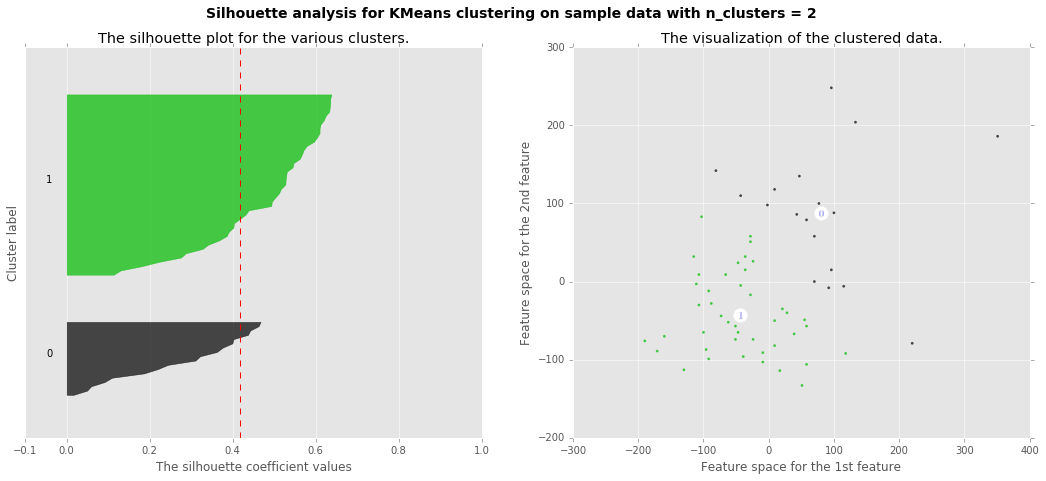

For n_clusters = 3 The average silhouette_score is : 0.388746564019


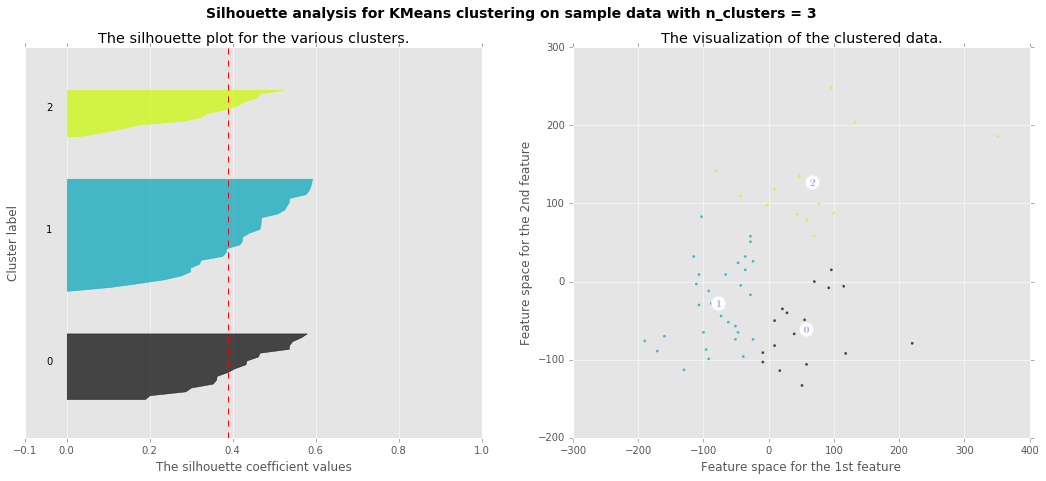

For n_clusters = 4 The average silhouette_score is : 0.388852985051


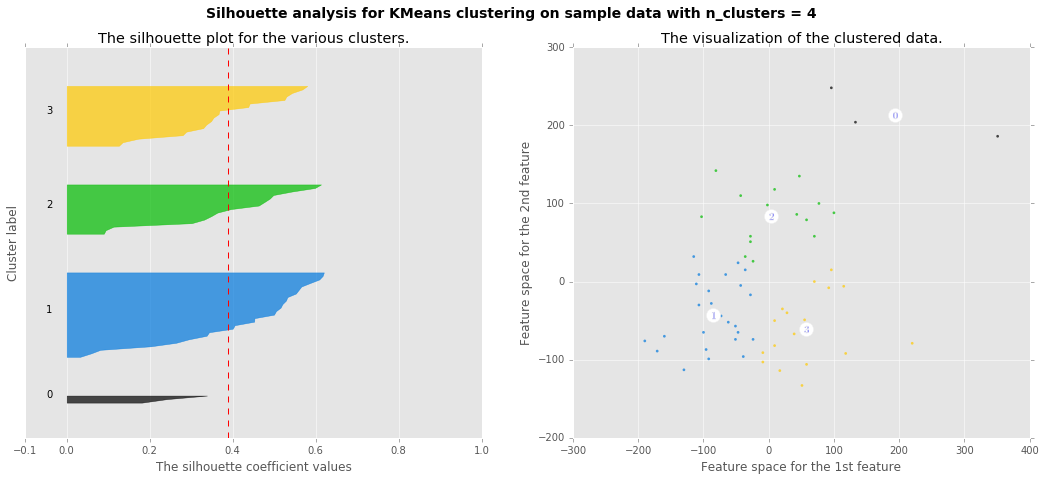

For n_clusters = 5 The average silhouette_score is : 0.370095149106


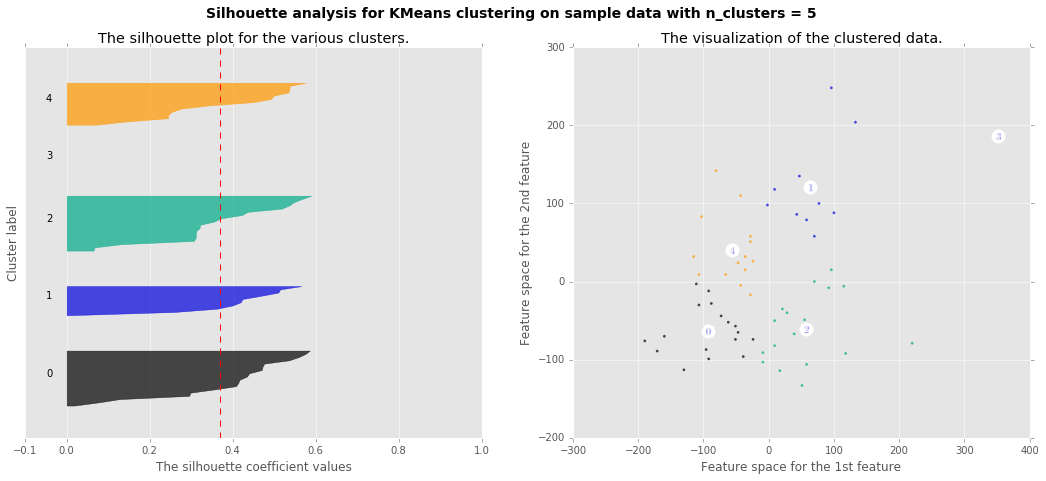

For n_clusters = 6 The average silhouette_score is : 0.36958221899


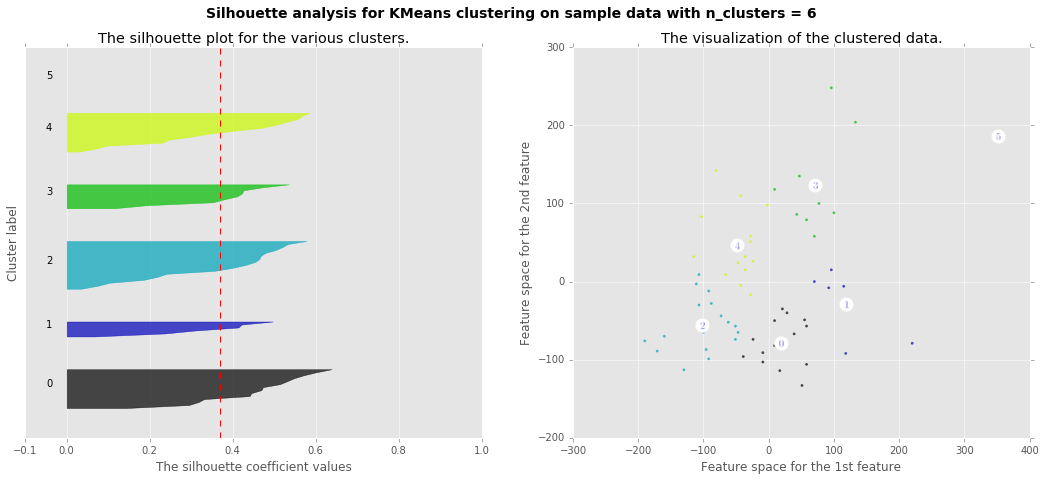

In [25]:
X = chem[['Ti', 'K']].values
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Elbow method

Sometimes our elbow isn't well-defined.

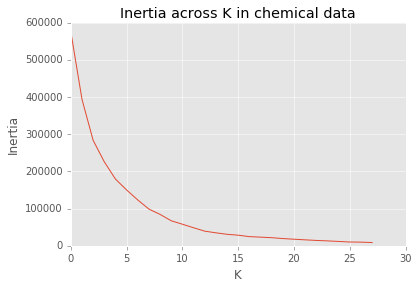

In [26]:
# As you can see, sometimes there is not a well-defined elbow!
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in chemical data")
sns.despine()

# Independent Work

Using the iris dataset.
* Fit a k-means model with a k of your choice. 
* Compute the silhouette score for your model.
* Using the code above create silhouette plots.
* Create an elbow plot